# ArXiv API

The ArXiV API allows programmatic access to the arXiv's e-print content and metadata. "The goal of the interface is to facilitate new and creative use of the the vast body of material on the arXiv by providing a low barrier to entry for application developers." https://arxiv.org/help/api

The API's user manual (https://arxiv.org/help/api/user-manual) provides helpful documentation for using the API and retrieving article metadata.

Our examples below will introduce you to the basics of querying the ArXiV API.

## Install Packages

In [91]:
import urllib
import arxiv
import requests
import json
import csv
import pandas as pd
from collections import Counter, defaultdict
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 
import datetime

## Query the API

Perform a simple query for "graphene." We'll limit results to the 100 most relevant papers. Take a look at the information you get back and how it is structured.

In [92]:
graphene = list(arxiv.Search(query="graphene", max_results=100).get())
graphene

phene. Systematic analysis reveals that interlayer interaction is essential
 for the presence (or absence) of M band whereas the substrate has no effect on
 this. Dispersive behaviors of these "new" Raman modes in graphene have been
 probed by the excitation energy dependent Raman spectroscopy. It is found that
 the appearance of the M band strictly relies on the AB stacking, which could be
 a fingerprint of AB-stacked bilayer graphene. This work expands the unique and
 powerful abilities of Raman spectroscopy on study of graphene and provides
 another effective way to probe phonon dispersion, electron-phonon coupling, and
 to exploit electronic band structure of graphene layers., comment=None, journal_ref=None, doi=None, primary_category=cond-mat.mtrl-sci, categories=['cond-mat.mtrl-sci'], links=[arxiv.Result.Link(http://arxiv.org/abs/1010.3391v1, title=None, rel=alternate, content_type=None), arxiv.Result.Link(http://arxiv.org/pdf/1010.3391v1, title=pdf, rel=related, content_type=Non

Do another query for the topic "quantum dots," but note that you could swap in a topic of your liking.

You can define a custom arXiv API client with specialized pagination behavior. This time we'll process each paper as it's fetched rather than exhausting the result-generator into a `list`; this is useful for running analysis while the client sleeps.

Because this `arxiv.Search` doesn't bound the number of results with `max_results`, it will fetch *every* matching paper (roughly 10,000). This may take several minutes.

In [93]:
results_generator = arxiv.Client(
  page_size=1000,
  delay_seconds=3,
  num_retries=3
).get(arxiv.Search(
  query='"quantum dots"',
  id_list=[],
  sort_by=arxiv.SortCriterion.Relevance,
  sort_order=arxiv.SortOrder.Descending,
))

quantum_dots = []
for paper in results_generator:
  # You could do per-paper analysis here; for now, just collect them in a list.
  quantum_dots.append(paper)

## Organize and analyze your results

Create a dataframe to better analyze your results. This example uses Python's [`vars`](https://docs.python.org/3/library/functions.html#vars) built-in function to convert search results into Python dictionaries of paper metadata.

In [94]:
qd_df = pd.DataFrame([vars(paper) for paper in quantum_dots])

We'll look at the first 10 results.

In [95]:
qd_df.head(10)

,entry_id,updated,published,title,authors,summary,comment,journal_ref,doi,primary_category,categories,links,pdf_url,_raw
0,http://arxiv.org/abs/cond-mat/0310363v1,2003-10-15 20:15:59+00:00,2003-10-15 20:15:59+00:00,Excitonic properties of strained wurtzite and ...,"[Vladimir A. Fonoberov, Alexander A. Balandin]",We investigate exciton states theoretically in...,None,"J. Appl. Phys. 94, 7178 (2003)",10.1063/1.1623330,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1063/1.1623330, http://a...",http://arxiv.org/pdf/cond-mat/0310363v1,{'id': 'http://arxiv.org/abs/cond-mat/0310363v...
1,http://arxiv.org/abs/2008.11666v1,2020-08-26 16:48:21+00:00,2020-08-26 16:48:21+00:00,A two-dimensional array of single-hole quantum...,"[F. van Riggelen, N. W. Hendrickx, W. I. L. La...",Quantum dots fabricated using techniques and m...,None,None,10.1063/5.0037330,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1063/5.0037330, http://a...",http://arxiv.org/pdf/2008.11666v1,"{'id': 'http://arxiv.org/abs/2008.11666v1', 'g..."
2,http://arxiv.org/abs/cond-mat/0411742v1,2004-11-30 02:56:15+00:00,2004-11-30 02:56:15+00:00,Polar optical phonons in wurtzite spheroidal q...,"[Vladimir A. Fonoberov, Alexander A. Balandin]",Polar optical-phonon modes are derived analyti...,None,"J. Phys.: Condens. Matter 17, 1085 (2005)",10.1088/0953-8984/17/7/003,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1088/0953-8984/17/7/003,...",http://arxiv.org/pdf/cond-mat/0411742v1,{'id': 'http://arxiv.org/abs/cond-mat/0411742v...
3,http://arxiv.org/abs/1403.4790v1,2014-03-19 13:03:49+00:00,2014-03-19 13:03:49+00:00,Group-velocity slowdown in quantum-dots and qu...,"[Stephan Michael, Weng W. Chow, Hans Christian...",We investigate theoretically the slowdown of o...,None,None,10.1117/12.2042412,cond-mat.mes-hall,"[cond-mat.mes-hall, cond-mat.mtrl-sci]","[http://dx.doi.org/10.1117/12.2042412, http://...",http://arxiv.org/pdf/1403.4790v1,"{'id': 'http://arxiv.org/abs/1403.4790v1', 'gu..."
4,http://arxiv.org/abs/cond-mat/0403328v1,2004-03-12 18:28:06+00:00,2004-03-12 18:28:06+00:00,A new method to epitaxially grow long-range or...,"[J. Bauer, D. Schuh, E. Uccelli, R. Schulz, A....",We report on a new approach for positioning of...,None,None,None,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://arxiv.org/abs/cond-mat/0403328v1, http...",http://arxiv.org/pdf/cond-mat/0403328v1,{'id': 'http://arxiv.org/abs/cond-mat/0403328v...
5,http://arxiv.org/abs/cond-mat/0411484v1,2004-11-18 16:47:14+00:00,2004-11-18 16:47:14+00:00,Giant optical anisotropy in a single InAs quan...,"[I. Favero, Guillaume Cassabois, A. Jankovic, ...",We present the experimental evidence of giant ...,None,None,10.1063/1.1854733,cond-mat.other,[cond-mat.other],"[http://dx.doi.org/10.1063/1.1854733, http://a...",http://arxiv.org/pdf/cond-mat/0411484v1,{'id': 'http://arxiv.org/abs/cond-mat/0411484v...
6,http://arxiv.org/abs/1003.2350v1,2010-03-11 15:52:09+00:00,2010-03-11 15:52:09+00:00,Linewidth broadening of a quantum dot coupled ...,"[Arka Majumdar, Andrei Faraon, Erik Kim, Dirk ...",We study the coupling between a photonic cryst...,None,None,10.1103/PhysRevB.82.045306,quant-ph,[quant-ph],"[http://dx.doi.org/10.1103/PhysRevB.82.045306,...",http://arxiv.org/pdf/1003.2350v1,"{'id': 'http://arxiv.org/abs/1003.2350v1', 'gu..."
7,http://arxiv.org/abs/1201.1258v1,2012-01-05 18:56:21+00:00,2012-01-05 18:56:21+00:00,Photoluminescence from In0.5Ga0.5As/GaP quantu...,"[Kelley Rivoire, Sonia Buckley, Yuncheng Song,...",We demonstrate room temperature visible wavele...,None,None,10.1103/PhysRevB.85.045319,quant-ph,"[quant-ph, physics.optics]","[http://dx.doi.org/10.1103/PhysRevB.85.045319,...",http://arxiv.org/pdf/1201.1258v1,"{'id': 'http://arxiv.org/abs/1201.1258v1', 'gu..."
8,http://arxiv.org/abs/1206.2674v1,2012-06-12 21:00:22+00:00,2012-06-12 21:00:22+00:00,Effective microscopic theory of quantum dot su...,[U. Aeberhard],We introduce a quantum dot orbital tight-bindi...,None,"Optical and 

Next, we'll create list of all of the columns in the dataframe to see what else is there:

In [96]:
list(qd_df)

['entry_id',
 'updated',
 'published',
 'title',
 'authors',
 'summary',
 'comment',
 'journal_ref',
 'doi',
 'primary_category',
 'categories',
 'links',
 'pdf_url',
 '_raw']

We have 14 columns overall. We'll add two derived columns––the name of the first listed author and a reference to the original `arxiv.Result` object-–then narrow the dataframe to paper titles, `published` dates, and first authors to run some analysis of publishing patterns over time.

In [97]:
# Add a first_author column: the name of the first author among each paper's list of authors.
qd_df['first_author'] = [authors_list[0].name for authors_list in qd_df['authors']]
# Keep a reference to the original results in the dataframe: this is useful for downloading PDFs.
qd_df['_result'] = quantum_dots

# Narrow our dataframe to just the columns we want for our analysis.
qd_df = qd_df[['title', 'published', 'first_author', '_result']]
qd_df

,title,published,first_author,_result
0,Excitonic properties of strained wurtzite and ...,2003-10-15 20:15:59+00:00,Vladimir A. Fonoberov,http://arxiv.org/abs/cond-mat/0310363v1
1,A two-dimensional array of single-hole quantum...,2020-08-26 16:48:21+00:00,F. van Riggelen,http://arxiv.org/abs/2008.11666v1
2,Polar optical phonons in wurtzite spheroidal q...,2004-11-30 02:56:15+00:00,Vladimir A. Fonoberov,http://arxiv.org/abs/cond-mat/0411742v1
3,Group-velocity slowdown in quantum-dots and qu...,2014-03-19 13:03:49+00:00,Stephan Michael,http://arxiv.org/abs/1403.4790v1
4,A new method to epitaxially grow long-range or...,2004-03-12 18:28:06+00:00,J. Bauer,http://arxiv.org/abs/cond-mat/0403328v1
...,...,...,...,...
10532,Emergence of New Materials for Exploiting High...,2020-08-18 09:45:29+00:00,Sourav Maiti,http://arxiv.org/abs/2008.07827v2
10533,Highly transparent contacts to the 1D hole gas...,2020-08-27 06:37:22+00:00,Masiar Sistani,http://arxiv.org/abs/2008.11938v1
10534,Three-terminal nonlocal conductance in Majoran...,2020-09-24 16:49:47+00:00,Haining Pan,http://arxiv.org/abs/2009.11809v3
10535,Probing dark exciton navigation through a loca...,2021-03-01 15:19:51+00:00,Ryan J. Gelly,http://arxiv.org/abs/2103.01064v1


## Visualize your results

Get a sense of the how your topic has trended over time. When did research on your topic take off? Create a bar chart of the number of articles published in each year.

<AxesSubplot:xlabel='published'>

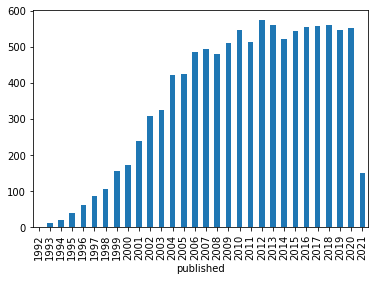

In [98]:
qd_df["published"].groupby(qd_df["published"].dt.year).count().plot(kind="bar")

Explore authors to see who is publishing your topic. Group by author, then sort and select the top 20 authors.

In [99]:
qd_authors = qd_df.groupby(qd_df["first_author"])["first_author"].count().sort_values(ascending=False)
qd_authors.head(20)

first_author
Bing Dong                 27
Y. Alhassid               20
Constantine Yannouleas    18
David M. -T. Kuo          16
Akira Oguri               15
Xuedong Hu                15
B. Szafran                14
Massimo Rontani           14
Rafael Sánchez            14
Kicheon Kang              14
Ulrich Hohenester         14
P. W. Brouwer             13
C. W. J. Beenakker        13
Piotr Trocha              12
O. Entin-Wohlman          12
Vidar Gudmundsson         12
Ramin M. Abolfath         11
A. A. Aligia              11
G. Giavaras               11
Arka Majumdar             11
Name: first_author, dtype: int64

## Identify and download papers

Let's download the oldest paper about quantum dots co-authored by Piotr Trocha:

In [100]:
qd_Trocha_sorted  = qd_df[qd_df['first_author']=='Piotr Trocha'].sort_values('published')
qd_Trocha_sorted

,title,published,first_author,_result
748,Dicke-like effect in spin-polarized transport ...,2007-11-22 16:11:11+00:00,Piotr Trocha,http://arxiv.org/abs/0711.3611v2
2275,Kondo-Dicke resonances in electronic transport...,2008-03-28 15:49:07+00:00,Piotr Trocha,http://arxiv.org/abs/0803.4154v1
3322,Negative tunnel magnetoresistance and differen...,2009-11-02 11:45:03+00:00,Piotr Trocha,http://arxiv.org/abs/0911.0291v1
5285,Beating in electronic transport through quantu...,2010-04-11 16:20:04+00:00,Piotr Trocha,http://arxiv.org/abs/1004.1819v2
2429,Orbital Kondo effect in double quantum dots,2010-08-17 14:13:23+00:00,Piotr Trocha,http://arxiv.org/abs/1008.2902v2
2471,The influence of spin-flip scattering on the p...,2011-05-08 20:12:41+00:00,Piotr Trocha,http://arxiv.org/abs/1105.1550v1
5448,Large enhancement of thermoelectric effects in...,2011-08-11 14:49:51+00:00,Piotr Trocha,http://arxiv.org/abs/1108.2422v2
7692,The role of the indirect tunneling processes a...,2011-09-12 20:51:49+00:00,Piotr Trocha,http://arxiv.org/abs/1109.2621v1
2606,Spin-polarized Andreev transport influenced by...,2014-09-14 23:54:35+00:00,Piotr Trocha,http://arxiv.org/abs/1409.4122v1
7644,Spin-resolved Andreev transport through double...,2015-08-24 19:02:49+00:00,Piotr Trocha,http://arxiv.org/abs/1508.05915v1


In [101]:
# Use the arxiv.Result object stored in the _result column to trigger a PDF download.
qd_Trocha_oldest = qd_Trocha_sorted.iloc[0]
qd_Trocha_oldest._result.download_pdf()

'./0711.3611v2.Dicke_like_effect_in_spin_polarized_transport_through_coupled_quantum_dots.pdf'

Confirm that the PDF has downloaded!

## Bibliography

- Tim Head: https://betatim.github.io/posts/analysing-the-arxiv/
- Lukas Schwab: https://github.com/lukasschwab/arxiv.py
- ArXiV API user manual: https://arxiv.org/help/api/user-manual        